In [687]:
from spectral import imshow, view_cube
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [688]:
# To load hyperspectral images of apples 

dark_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_REF_DARK_02_16_2021.hdr',
                     'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_REF_DARK_02_16_2021.raw')
white_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_REF_WHITE_02_01_2021.hdr',
                      'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_REF_WHITE_02_01_2021.raw')
data_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_FC18_CALYX_02_16_2021.hdr',
                     'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_FC18_CALYX_02_16_2021.raw')

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


C:\Users\nek222\Anaconda3\lib\site-packages\spectral\io\envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


In [689]:
# To convert images to 3D numpy arrays 

white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())
data_nparr.shape

<ipython-input-689-d2e4d8cdd866>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  white_nparr = np.array(white_ref.load())
<ipython-input-689-d2e4d8cdd866>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  dark_nparr = np.array(dark_ref.load())
<ipython-input-689-d2e4d8cdd866>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_nparr = np.array(data_ref.load())


(375, 320, 256)

In [690]:
# An example of spectrum for a single pixel at (X,Y) = (100,100)
data_nparr[100,100,:]

array([  0., 126., 153., 134., 135., 157., 138., 137., 157., 143., 134.,
       152., 137., 141., 162., 148., 165., 126., 141., 146., 141., 144.,
       180., 153., 135., 140., 144., 151., 156., 138., 163., 140., 156.,
       152., 136., 131., 150., 159., 145., 134., 138., 174., 145., 155.,
       131., 156., 158., 138., 131., 148., 144., 136., 142., 171., 146.,
       155., 131., 163., 137., 135., 165., 145., 154., 147., 157., 143.,
       139., 153., 143., 125., 139., 142., 142., 139., 143., 139., 147.,
       139., 173., 139., 134., 133., 134., 149., 147., 150., 139., 146.,
       131., 158., 135., 150., 138., 132., 145., 136., 145., 140., 141.,
       134., 145., 157., 152., 143., 140., 141., 136., 143., 141., 143.,
       139., 161., 129., 145., 154., 133., 146., 148., 137., 145., 145.,
       158., 132., 135., 153., 128., 140., 128., 132., 133., 148., 133.,
       148., 155., 154., 135., 146., 171., 154., 151., 145., 140., 152.,
       138., 149., 138., 135., 147., 140., 133., 15

ImageView object:
  Display bands       :  (20, 20, 20)
  Interpolation       :  <default>
  RGB data limits     :
    R: [104.0, 351.0]
    G: [104.0, 351.0]
    B: [104.0, 351.0]

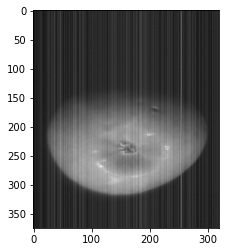

In [691]:
# To show a 2D grayscale image at a specific wavelength 
imshow(data_nparr, (20, 20, 20))

In [692]:
# To crop the image array 
white_nparr = white_nparr[0:320,:,:]
dark_nparr = dark_nparr[0:320,:,:]
data_nparr = data_nparr[0:320,:,:] 

ImageView object:
  Display bands       :  (20, 20, 50)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.08235294371843338, 0.7647058963775635]
    G: [-0.08235294371843338, 0.7647058963775635]
    B: [-0.08627451211214066, 0.9803921580314636]

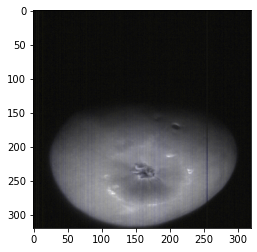

In [697]:
# To calibrate the target image using white and dark reference images
corrected_nparr = np.divide(np.subtract(data_nparr, dark_nparr), np.subtract(white_nparr, dark_nparr))
corrected_nparr = np.subtract(data_nparr, dark_nparr)/255

imshow(corrected_nparr, (20, 20, 50))

In [672]:
# To load the wavebands or wavelengths as a numpy array 
bands = np.genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Wavelength_Band_NIR.csv', delimiter=',')


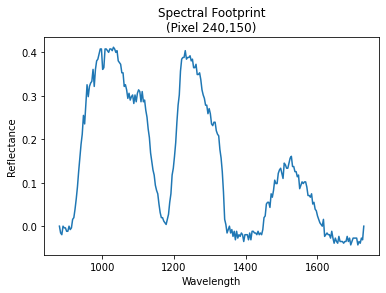

In [683]:
# To plot and visualization of the spectrum of a single pixel as reflectance vs. wavelengths
pixel_x = 240
pixel_y = 150


pixel = corrected_nparr[pixel_x:pixel_x+1,pixel_y:pixel_y+1:]

pixel_squeezed = np.squeeze(pixel)

plt.plot(bands, pixel_squeezed)
plt.title('Spectral Footprint\n(Pixel {},{})'.format(
    pixel_x, pixel_y))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

In [566]:
# To see the values of the spectrum 
pixel_value = corrected_nparr[25,25,:]
pixel_value

array([ 0.        , -0.02745098, -0.02352941, -0.02745098, -0.02352941,
       -0.01176471, -0.01568628, -0.02352941, -0.03137255, -0.01568628,
       -0.03137255, -0.01960784, -0.01568628, -0.01960784, -0.03137255,
       -0.01960784, -0.02352941, -0.02745098, -0.01176471, -0.02352941,
       -0.01568628, -0.01960784, -0.01960784, -0.01568628, -0.02352941,
       -0.02352941, -0.01568628, -0.03529412, -0.01568628, -0.01568628,
       -0.01960784, -0.02745098, -0.02352941, -0.03137255, -0.01568628,
       -0.01568628, -0.01568628, -0.02352941, -0.00784314, -0.02352941,
       -0.02745098, -0.01176471, -0.00784314, -0.01568628, -0.01568628,
       -0.03529412, -0.02352941, -0.02352941, -0.01960784,  0.        ,
       -0.02352941, -0.01568628, -0.01568628, -0.01960784, -0.01568628,
       -0.02745098, -0.03529412, -0.01960784, -0.02352941, -0.01960784,
       -0.03529412, -0.02352941, -0.02352941, -0.01568628, -0.01960784,
       -0.03529412, -0.01568628, -0.03137255, -0.02352941, -0.01

In [684]:
# To define a region of interest (ROI) as a rectangulare box at a pint (x,y)
(x,y) = (240,150)
h = 10
w = 10
roi = corrected_nparr[y:y+h, x:x+w, :]   
roi

array([[[ 0.        , -0.04313726, -0.04705882, ..., -0.03137255,
         -0.02745098,  0.        ],
        [ 0.        , -0.04313726, -0.03529412, ..., -0.05098039,
         -0.02745098,  0.        ],
        [ 0.        , -0.04313726, -0.03137255, ..., -0.03137255,
         -0.03529412,  0.        ],
        ...,
        [ 0.        , -0.04705882, -0.04313726, ..., -0.04705882,
         -0.05490196,  0.        ],
        [ 0.        , -0.02352941, -0.04705882, ..., -0.02745098,
         -0.04313726,  0.        ],
        [ 0.        , -0.04313726, -0.04313726, ..., -0.03921569,
         -0.03529412,  0.        ]],

       [[ 0.        , -0.04313726, -0.01960784, ..., -0.03921569,
         -0.02352941,  0.        ],
        [ 0.        , -0.04705882, -0.03137255, ..., -0.03529412,
         -0.03921569,  0.        ],
        [ 0.        , -0.03529412, -0.04705882, ..., -0.03529412,
         -0.04705882,  0.        ],
        ...,
        [ 0.        , -0.03137255, -0.03529412, ..., -

In [685]:
# To reshape the value from ROI as a dataset with 100 rows and 256 columns (the spectrum of each pixel as a row)
roi_reshaped = np.reshape(roi, (100,256))
# To trim the noise from both ends of the spectrum
roi_reshaped = roi_reshaped[:,6:247]
roi_reshaped.shape

(100, 241)

In [686]:
# To save the dataset for the apple sample as a 2D numpy array or a table 
np.save("C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_FC18_CALYX_02_16_2021_calyx", roi_reshaped)